In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import cufflinks as cf
import plotly.express as px
import matplotlib.pylab as plt
from pandas.api.types import CategoricalDtype
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
sns.set_style("whitegrid")

In [ ]:
df=pd.read_excel("/content/2019_12_1430196.xlsx")

In [ ]:
df.head()

,Unnamed: 0,index,approveDate,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,editorsSelection,isAnonymous,parentID,parentUserDisplayName,permID,picURL,recommendations,recommendedFlag,replies,replyCount,status,trusted,updateDate,userDisplayName,userID,userLocation,userTitle,userURL
0,0,0,1575578237,"That Climate Change is a crisis, no question a...",103979957,103979957,<br\//>,comment,1575518751,1,False,False,NaN,NaN,103979957,NaN,0,0,[],0,approved,0,1575578237,manfred marcus,47112177,Bolivia,NaN,NaN
1,1,1,1575577512,Here is the reality:\n\nHomo sapiens extinctio...,103982600,103982600,<br\//>,comment,1575543345,1,False,False,NaN,NaN,103982600,NaN,0,0,[],0,approved,0,1575581592,David Anderson,18110060,North Carolina,NaN,NaN
2,2,2,1575576290,FAIRNESS? How fair is it that carbon pollutio...,103980103,103980103,<br\//>,comment,1575519425,1,False,False,NaN,NaN,103980103,NaN,0,0,[],0,approved,0,1575576290,John Jones,35001936,Cherry Hill NJ,NaN,NaN
3,3,3,1575563982,Donâ€™t forget to add fast fashion to this equ...,103981017,103981017,<br\//>,comment,1575525285,1,False,False,NaN,NaN,103981017,NaN,0,0,[],0,approved,0,1575563982,Rachel,54903404,North Dakota,NaN,NaN
4,4,4,1575563980,"If Americans produce 17 tons each of CO2, that...",103983048,103983048,<br\//>,comment,1575546432,1,False,False,NaN,NaN,103983048,NaN,1,0,[],0,approved,0,1577344781,Bruce Rozenblit,38331232,"Kansas City, MO",NaN,NaN


In [ ]:
df.isna().sum().sort_values(ascending=False)

userURL                  50
userTitle                50
parentID                 50
parentUserDisplayName    50
picURL                   44
userDisplayName           0
editorsSelection          0
index                     0
approveDate               0
commentBody               0
commentID                 0
commentSequence           0
commentTitle              0
commentType               0
createDate                0
depth                     0
isAnonymous               0
updateDate                0
userLocation              0
userID                    0
permID                    0
recommendations           0
recommendedFlag           0
replies                   0
replyCount                0
status                    0
trusted                   0
Unnamed: 0                0
dtype: int64

###**Number of comments per UserID**

In [ ]:
s=df["userID"].value_counts().sort_values(ascending=False)
s

48183969     2
102912310    2
54841678     2
68358354     1
76207175     1
56122568     1
5447187      1
86094029     1
5314511      1
35001936     1
73704721     1
72108830     1
64687788     1
61319008     1
52655875     1
65975063     1
64591704     1
54903404     1
10919504     1
19926270     1
60741395     1
70354750     1
90261957     1
89661122     1
71598178     1
47112177     1
40498339     1
7435219      1
34954663     1
63321641     1
49453908     1
18110060     1
69843538     1
75215278     1
77989539     1
91212147     1
38331232     1
66282869     1
72099382     1
79972461     1
21896305     1
56727460     1
57353517     1
81585724     1
28888288     1
59585777     1
66315474     1
Name: userID, dtype: int64

###**Location wise count of comments**

In [ ]:
l=df["userLocation"].value_counts().sort_values(ascending=False)
l

Seattle                         3
Westchester                     2
Koloa, HI                       2
USA                             2
NYC                             1
Berkeley CA                     1
US                              1
San Francisco                   1
Bolivia                         1
Norcal                          1
Los Angeles                     1
Lowertown MN                    1
California                      1
Columbus OH                     1
WA                              1
Boston                          1
None of your business           1
Las Vegas                       1
White, New Jersey               1
Florida                         1
Longmont, COlorado              1
St. Louis                       1
North Carolina                  1
Leadville, CO                   1
North Dakota                    1
East Coast                      1
CA                              1
Mill Valley, California         1
Mountain Home, Idaho            1
bklyn         

###**Editors selection**

In [ ]:
e=df["editorsSelection"].value_counts().sort_values(ascending=False)
e


False    42
True      8
Name: editorsSelection, dtype: int64

In [ ]:
editorschoice= df.loc[(df['editorsSelection'] == True)]
editorschoice

,Unnamed: 0,index,approveDate,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,editorsSelection,isAnonymous,parentID,parentUserDisplayName,permID,picURL,recommendations,recommendedFlag,replies,replyCount,status,trusted,updateDate,userDisplayName,userID,userLocation,userTitle,userURL
15,15,15,1575516870,Most Americans think dealing with climate chan...,103967576,103967576,<br\//>,comment,1575483559,1,True,False,NaN,NaN,103967576,NaN,50,0,"[{'commentID': 103968274, 'status': 'approved'...",11,approved,0,1577805407,D,34954663,WA,NaN,NaN
16,16,16,1575516780,Fairness means you pay for what you pollute. ...,103978405,103978405,<br\//>,comment,1575512798,1,True,False,NaN,NaN,103978405,NaN,18,0,"[{'commentID': 103978871, 'status': 'approved'...",4,approved,0,1575660569,Fair And Not Square,56122568,"Grass Valley, Ca",NaN,NaN
17,17,17,1575516767,"I hate to be the one to point this out, but th...",103976626,103976626,<br\//>,comment,1575506937,1,True,False,NaN,NaN,103976626,NaN,7,0,"[{'commentID': 103978193, 'status': 'approved'...",2,approved,0,1577808734,laurence,59585777,bklyn,NaN,NaN
18,18,18,1575516717,I have eliminated 80% of my driving miles beca...,103969918,103969918,<br\//>,comment,1575489633,1,True,False,NaN,NaN,103969918,NaN,8,0,"[{'commentID': 103982575, 'status': 'approved'...",1,approved,0,1577978975,John,66315474,Virginia,NaN,NaN
19,19,19,1575516704,Too much debate on climate change is driven by...,103969188,103969188,<br\//>,comment,1575487644,1,True,False,NaN,NaN,103969188,NaN,15,0,"[{'commentID': 103970932, 'status': 'approved'...",4,approved,0,1575660603,OneView,66282869,Boston,NaN,NaN
20,20,20,1575516680,Natural gas may have helped to reduce carbon d...,103971613,103971613,<br\//>,comment,1575493969,1,True,False,NaN,NaN,103971613,NaN,16,0,[],0,approved,0,1575565186,r2d2,28888288,"Longmont, COlorado",NaN,NaN
21,21,21,1575516623,I applaud the author for mentioning car owners...,103979166,103979166,<br\//>,comment,1575515750,1,True,False,NaN,NaN,103979166,NaN,9,0,[],0,approved,0,1575601352,Alan,75215278,Columbus OH,NaN,NaN
24,24,24,1575516513,"Sadly, but nonetheless telling is this simple ...",103968295,103968295,<br\//>,comment,1575485295,1,True,False,NaN,NaN,103968295,NaN,5,0,[],0,approved,0,1577544949,Alan C Gregory,72108830,"Mountain Home, Idaho",NaN,NaN


In [ ]:
editorschoice.commentBody


15    Most Americans think dealing with climate chan...
16    Fairness means you pay for what you pollute.  ...
17    I hate to be the one to point this out, but th...
18    I have eliminated 80% of my driving miles beca...
19    Too much debate on climate change is driven by...
20    Natural gas may have helped to reduce carbon d...
21    I applaud the author for mentioning car owners...
24    Sadly, but nonetheless telling is this simple ...
Name: commentBody, dtype: object

###**Reply Count**

In [ ]:
e=df["replyCount"].sort_values(ascending=False)
e

15    11
48     5
38     5
19     4
46     4
16     4
40     2
27     2
28     2
41     2
17     2
45     2
47     2
36     1
35     1
18     1
11     0
13     0
12     0
14     0
49     0
10     0
9      0
8      0
7      0
5      0
4      0
3      0
2      0
1      0
6      0
24     0
20     0
21     0
44     0
43     0
42     0
39     0
37     0
34     0
33     0
32     0
31     0
30     0
29     0
26     0
25     0
23     0
22     0
0      0
Name: replyCount, dtype: int64

In [ ]:
e=df["recommendations"].sort_values(ascending=False)
e

15    50
48    37
44    20
39    20
16    18
20    16
46    15
19    15
49    14
43     9
21     9
18     8
34     8
29     7
14     7
17     7
40     7
47     6
13     5
24     5
31     5
41     5
38     5
27     3
12     3
35     2
33     2
45     2
28     2
9      2
4      1
37     1
23     1
26     1
5      1
6      1
42     1
7      0
3      0
2      0
1      0
30     0
8      0
10     0
11     0
36     0
32     0
22     0
25     0
0      0
Name: recommendations, dtype: int64

# Exploring Reply and replyCount

In [2]:
import pandas as pd

In [6]:
comm = "/content/newspaper_comments.csv"

In [7]:
df = pd.read_csv(comm)

In [ ]:
df.keys()

Index(['Unnamed: 0', 'index', 'approveDate', 'commentBody', 'commentID',
       'commentSequence', 'commentTitle', 'commentType', 'createDate', 'depth',
       'editorsSelection', 'isAnonymous', 'parentID', 'parentUserDisplayName',
       'permID', 'picURL', 'recommendations', 'recommendedFlag', 'replies',
       'replyCount', 'status', 'trusted', 'updateDate', 'userDisplayName',
       'userID', 'userLocation', 'userTitle', 'userURL'],
      dtype='object')

In [ ]:
df[df['commentID'] == 103966915]['replyCount']

48    5
Name: replyCount, dtype: int64

In [ ]:
rep = df[df['commentID'] == 103966915]['replies']

In [ ]:
for x in rep:
  print (x)

[{'commentID': 103967767, 'status': 'approved', 'commentSequence': 103967767, 'userID': 67154721, 'userDisplayName': 'Jim Linnane', 'userLocation': 'Bar Harbor', 'userTitle': 'NULL', 'userURL': 'NULL', 'picURL': None, 'commentTitle': '<br\\//>', 'commentBody': '@Rose Not to mention asking how those at the climate conference in Madrid traveled there. Do as I say and do not do as I do is not a fitting way to enlist others in the fight against climate changde.', 'createDate': '1575484030', 'updateDate': '1575518200', 'approveDate': '1575484031', 'recommendations': 4, 'replyCount': 0, 'replies': [], 'editorsSelection': False, 'parentID': 103966915, 'parentUserDisplayName': 'Rose', 'depth': 2, 'commentType': 'userReply', 'trusted': 0, 'recommendedFlag': 0, 'permID': '103967767', 'isAnonymous': False}, {'commentID': 103968347, 'status': 'approved', 'commentSequence': 103968347, 'userID': 66240999, 'userDisplayName': 'Steven Harrell', 'userLocation': 'DC', 'userTitle': 'NULL', 'userURL': 'NUL

In [ ]:
dep =df[df['commentID'] == 103966915]['depth']
dep

48    1
Name: depth, dtype: int64

In [ ]:
 rep_comm = df['replies']

In [ ]:
for x in r:
  print(x)

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[{'commentID': 103968274, 'status': 'approved', 'commentSequence': 103968274, 'userID': 50097185, 'userDisplayName': 'Marta', 'userLocation': 'NYC', 'userTitle': 'NULL', 'userURL': 'NULL', 'picURL': None, 'commentTitle': '<br\\//>', 'commentBody': 'Overemphasis on what individuals do is another reason there is no political will. \n\nMegacorps  have successfully directed attention to individual actions - but it’s industry that’s responsible for the vast majority of emissions and environmental degradation.  Not consumers.\n\nSure, individuals will need to change behavior- it’s all hands on deck now that we’ve dilly dallied.  Some actions, like reducing meat consumption, really help. \n\nBut pressuring politicians/demanding action on policies like carbon taxes, incentives for alternative energy, research into carbon sequestration will have far greater impact. Don’t let them change the conversation.', 'createDate': '1575485257', 'updateDate': '1

In [ ]:
for x in r:
  if 'commentID' in x:
    print(x)
    

[{'commentID': 103968274, 'status': 'approved', 'commentSequence': 103968274, 'userID': 50097185, 'userDisplayName': 'Marta', 'userLocation': 'NYC', 'userTitle': 'NULL', 'userURL': 'NULL', 'picURL': None, 'commentTitle': '<br\\//>', 'commentBody': 'Overemphasis on what individuals do is another reason there is no political will. \n\nMegacorps  have successfully directed attention to individual actions - but it’s industry that’s responsible for the vast majority of emissions and environmental degradation.  Not consumers.\n\nSure, individuals will need to change behavior- it’s all hands on deck now that we’ve dilly dallied.  Some actions, like reducing meat consumption, really help. \n\nBut pressuring politicians/demanding action on policies like carbon taxes, incentives for alternative energy, research into carbon sequestration will have far greater impact. Don’t let them change the conversation.', 'createDate': '1575485257', 'updateDate': '1577805382', 'approveDate': '1575485258', 'rec

In [8]:
# dataframe of all the replies

rep_df = pd.DataFrame(df.loc[df['replies'].str.contains('status')]['replies'])
rep_df                     

,replies
15,"[{'commentID': 103968274, 'status': 'approved'..."
16,"[{'commentID': 103978871, 'status': 'approved'..."
17,"[{'commentID': 103978193, 'status': 'approved'..."
18,"[{'commentID': 103982575, 'status': 'approved'..."
19,"[{'commentID': 103970932, 'status': 'approved'..."
27,"[{'commentID': 103979083, 'status': 'approved'..."
28,"[{'commentID': 103978148, 'status': 'approved'..."
35,"[{'commentID': 103972060, 'status': 'approved'..."
36,"[{'commentID': 103972294, 'status': 'approved'..."
38,"[{'commentID': 103969633, 'status': 'approved'..."


In [9]:
# data_frame of the commentIds which have replies

par_df = pd.DataFrame(df.loc[df['replies'].str.contains('status')]['commentID'])
par_df 

,commentID
15,103967576
16,103978405
17,103976626
18,103969918
19,103969188
27,103973922
28,103973225
35,103970694
36,103970181
38,103968926


In [10]:
# data_frame of the commentIds which have replies

count_df = pd.DataFrame(df.loc[df['replies'].str.contains('status')]['replyCount'])
count_df 

,replyCount
15,11
16,4
17,2
18,1
19,4
27,2
28,2
35,1
36,1
38,5


In [11]:
# Above 3 dataframes are merged
df3 = pd.merge(par_df, rep_df, left_index=True, right_index = True)
new_df = pd.merge(df3, count_df, left_index=True, right_index = True)
new_df

,commentID,replies,replyCount
15,103967576,"[{'commentID': 103968274, 'status': 'approved'...",11
16,103978405,"[{'commentID': 103978871, 'status': 'approved'...",4
17,103976626,"[{'commentID': 103978193, 'status': 'approved'...",2
18,103969918,"[{'commentID': 103982575, 'status': 'approved'...",1
19,103969188,"[{'commentID': 103970932, 'status': 'approved'...",4
27,103973922,"[{'commentID': 103979083, 'status': 'approved'...",2
28,103973225,"[{'commentID': 103978148, 'status': 'approved'...",2
35,103970694,"[{'commentID': 103972060, 'status': 'approved'...",1
36,103970181,"[{'commentID': 103972294, 'status': 'approved'...",1
38,103968926,"[{'commentID': 103969633, 'status': 'approved'...",5


# Visualizing Data

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
depth_graph = nx.from_pandas_edgelist(df, source = "commentID", target = "depth")

In [ ]:
type (depth_graph)

networkx.classes.graph.Graph

In [ ]:
nx.info(depth_graph)

'Graph with 51 nodes and 50 edges'

In [ ]:
depth_graph.nodes()

NodeView((103979957, 1, 103982600, 103980103, 103981017, 103983048, 103981423, 103979428, 103982826, 103981660, 103981263, 103981241, 103980936, 103980641, 103980494, 103979619, 103967576, 103978405, 103976626, 103969918, 103969188, 103971613, 103979166, 103969595, 103972443, 103968295, 103977795, 103976392, 103973922, 103973225, 103972175, 103971611, 103971041, 103969392, 103971459, 103971403, 103970694, 103970181, 103969818, 103968926, 103968897, 103968690, 103968405, 103968329, 103967815, 103967583, 103967485, 103967455, 103967064, 103966915, 103966806))

In [ ]:
depth_graph.edges()

EdgeView([(103979957, 1), (1, 103982600), (1, 103980103), (1, 103981017), (1, 103983048), (1, 103981423), (1, 103979428), (1, 103982826), (1, 103981660), (1, 103981263), (1, 103981241), (1, 103980936), (1, 103980641), (1, 103980494), (1, 103979619), (1, 103967576), (1, 103978405), (1, 103976626), (1, 103969918), (1, 103969188), (1, 103971613), (1, 103979166), (1, 103969595), (1, 103972443), (1, 103968295), (1, 103977795), (1, 103976392), (1, 103973922), (1, 103973225), (1, 103972175), (1, 103971611), (1, 103971041), (1, 103969392), (1, 103971459), (1, 103971403), (1, 103970694), (1, 103970181), (1, 103969818), (1, 103968926), (1, 103968897), (1, 103968690), (1, 103968405), (1, 103968329), (1, 103967815), (1, 103967583), (1, 103967485), (1, 103967455), (1, 103967064), (1, 103966915), (1, 103966806)])

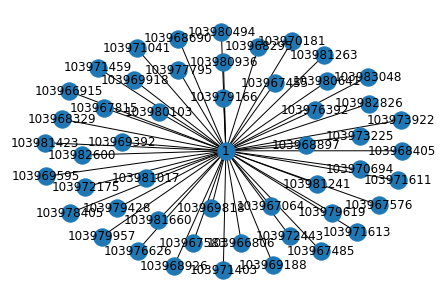

In [ ]:
nx.draw(depth_graph, with_labels = True)

The above graph is indicating that all the comments have depth 1

In [ ]:
nx.degree(depth_graph)

DegreeView({103979957: 1, 1: 50, 103982600: 1, 103980103: 1, 103981017: 1, 103983048: 1, 103981423: 1, 103979428: 1, 103982826: 1, 103981660: 1, 103981263: 1, 103981241: 1, 103980936: 1, 103980641: 1, 103980494: 1, 103979619: 1, 103967576: 1, 103978405: 1, 103976626: 1, 103969918: 1, 103969188: 1, 103971613: 1, 103979166: 1, 103969595: 1, 103972443: 1, 103968295: 1, 103977795: 1, 103976392: 1, 103973922: 1, 103973225: 1, 103972175: 1, 103971611: 1, 103971041: 1, 103969392: 1, 103971459: 1, 103971403: 1, 103970694: 1, 103970181: 1, 103969818: 1, 103968926: 1, 103968897: 1, 103968690: 1, 103968405: 1, 103968329: 1, 103967815: 1, 103967583: 1, 103967485: 1, 103967455: 1, 103967064: 1, 103966915: 1, 103966806: 1})

In [ ]:
rep_graph = nx.from_pandas_edgelist(df, source = "commentID", target = "replyCount")

In [ ]:
nx.info(rep_graph)

'Graph with 56 nodes and 50 edges'

In [ ]:
rep_graph.edges

EdgeView([(103979957, 0), (0, 103982600), (0, 103980103), (0, 103981017), (0, 103983048), (0, 103981423), (0, 103979428), (0, 103982826), (0, 103981660), (0, 103981263), (0, 103981241), (0, 103980936), (0, 103980641), (0, 103980494), (0, 103979619), (0, 103971613), (0, 103979166), (0, 103969595), (0, 103972443), (0, 103968295), (0, 103977795), (0, 103976392), (0, 103972175), (0, 103971611), (0, 103971041), (0, 103969392), (0, 103971459), (0, 103971403), (0, 103969818), (0, 103968897), (0, 103968329), (0, 103967815), (0, 103967583), (0, 103966806), (103967576, 11), (103978405, 4), (4, 103969188), (4, 103967455), (103976626, 2), (2, 103973922), (2, 103973225), (2, 103968690), (2, 103968405), (2, 103967485), (2, 103967064), (103969918, 1), (1, 103970694), (1, 103970181), (103968926, 5), (5, 103966915)])

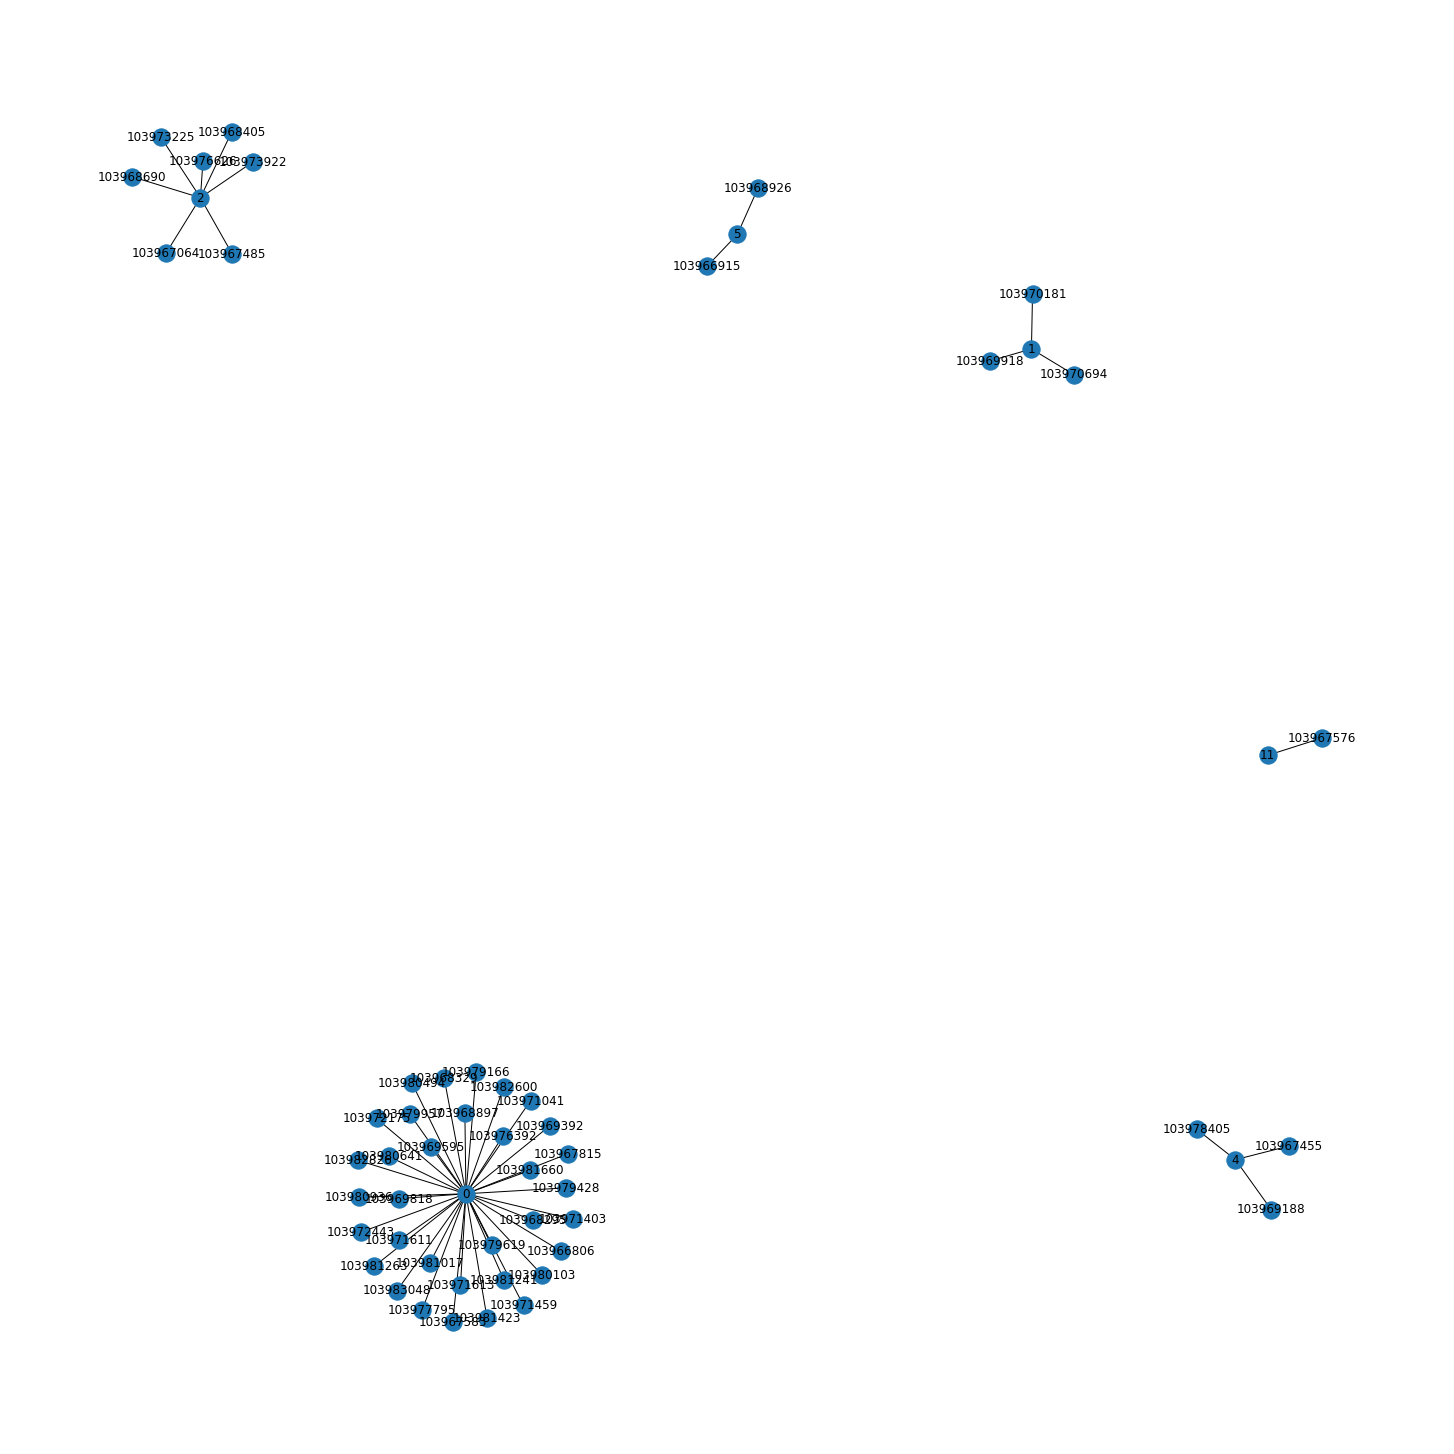

In [ ]:
plt.figure(figsize=(20,20))
nx.draw(depth_graph, with_labels = True)
plt.show()